Import Functions

In [388]:
#pip install geopy

#DF/EDA imports
import geopy.distance
import pandas as pd
import numpy as np

#plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.cm as cm

#modeling imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

Importing DF and EDA

In [2]:
df = pd.read_csv('cc_fraud.csv')

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df['name'] = df['first'] + " " + df['last']

In [5]:
df = df.drop(columns = ["Unnamed: 0", "first" , "last" , "trans_num"])

In [7]:
len(df['name'].unique())

917

In [9]:
(df.is_fraud == 1).sum()

2145

In [46]:
percent_fraud = 2145 / 555719
print(percent_fraud)
print(1 - percent_fraud)

0.0038598644278853163
0.9961401355721147


Getting Purchase Distances Using Coordinates

In [10]:
lat_list = list(df["lat"])
long_list = list(df["long"])

In [11]:
merch_lat_list = list(df["merch_lat"])
merch_long_list = list(df["merch_long"])

In [12]:
lat_dist = []
long_dist = []

In [13]:
for idx, value in enumerate (lat_list):
    lat_dist.append(abs(value - merch_lat_list[idx]))
    
for idx, value in enumerate (long_list):
    long_dist.append(abs(value - merch_long_list[idx]))

In [14]:
coords_1 = (lat_list[0], long_list[0])
coords_2 = (merch_lat_list[0], merch_long_list[0])

In [15]:
def distance_from_merch(lat1 , lat2 , long1 , long2):
    coords_1 = (lat1, long1)
    coords_2 = (lat2, long2)
    return geopy.distance.distance(coords_1, coords_2).miles

In [16]:
distance_list = []
for idx, x in enumerate(lat_list):
    distance_list.append(distance_from_merch(lat_list[idx], merch_lat_list[idx], long_list[idx], merch_long_list[idx]))


In [17]:
df["Purchase_Distance"] = distance_list

In [18]:
df.Purchase_Distance.describe()

count    555719.000000
mean         47.288052
std          18.077446
min           0.077162
25%          34.366305
50%          48.596896
75%          61.192229
max          93.624323
Name: Purchase_Distance, dtype: float64

In [19]:
df = df.drop(columns = ["lat", "long" , "merch_lat" , "merch_long", 'cc_num' , 'street' , 'city' , 'state'])

In [20]:
fraud_df = df[df.is_fraud != 0]
#fraud_df

In [21]:
fraud_df.Purchase_Distance.describe()

count    2145.000000
mean       47.357439
std        18.170757
min         2.391444
25%        34.346876
50%        48.848000
75%        61.151859
max        88.683159
Name: Purchase_Distance, dtype: float64

In [22]:
df.head()

,trans_date_trans_time,merchant,category,amt,gender,zip,city_pop,job,dob,unix_time,is_fraud,name,Purchase_Distance
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,29209,333497,Mechanical engineer,1968-03-19,1371816865,0,Jeff Elliott,15.294273
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,84002,302,"Sales professional, IT",1990-01-17,1371816873,0,Joanne Williams,65.140855
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,34496,"Librarian, public",1970-10-21,1371816893,0,Ashley Lopez,36.788154
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,32780,54767,Set designer,1987-07-25,1371816915,0,Brian Williams,17.159238
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,49632,1126,Furniture designer,1955-07-06,1371816917,0,Nathan Massey,64.885553


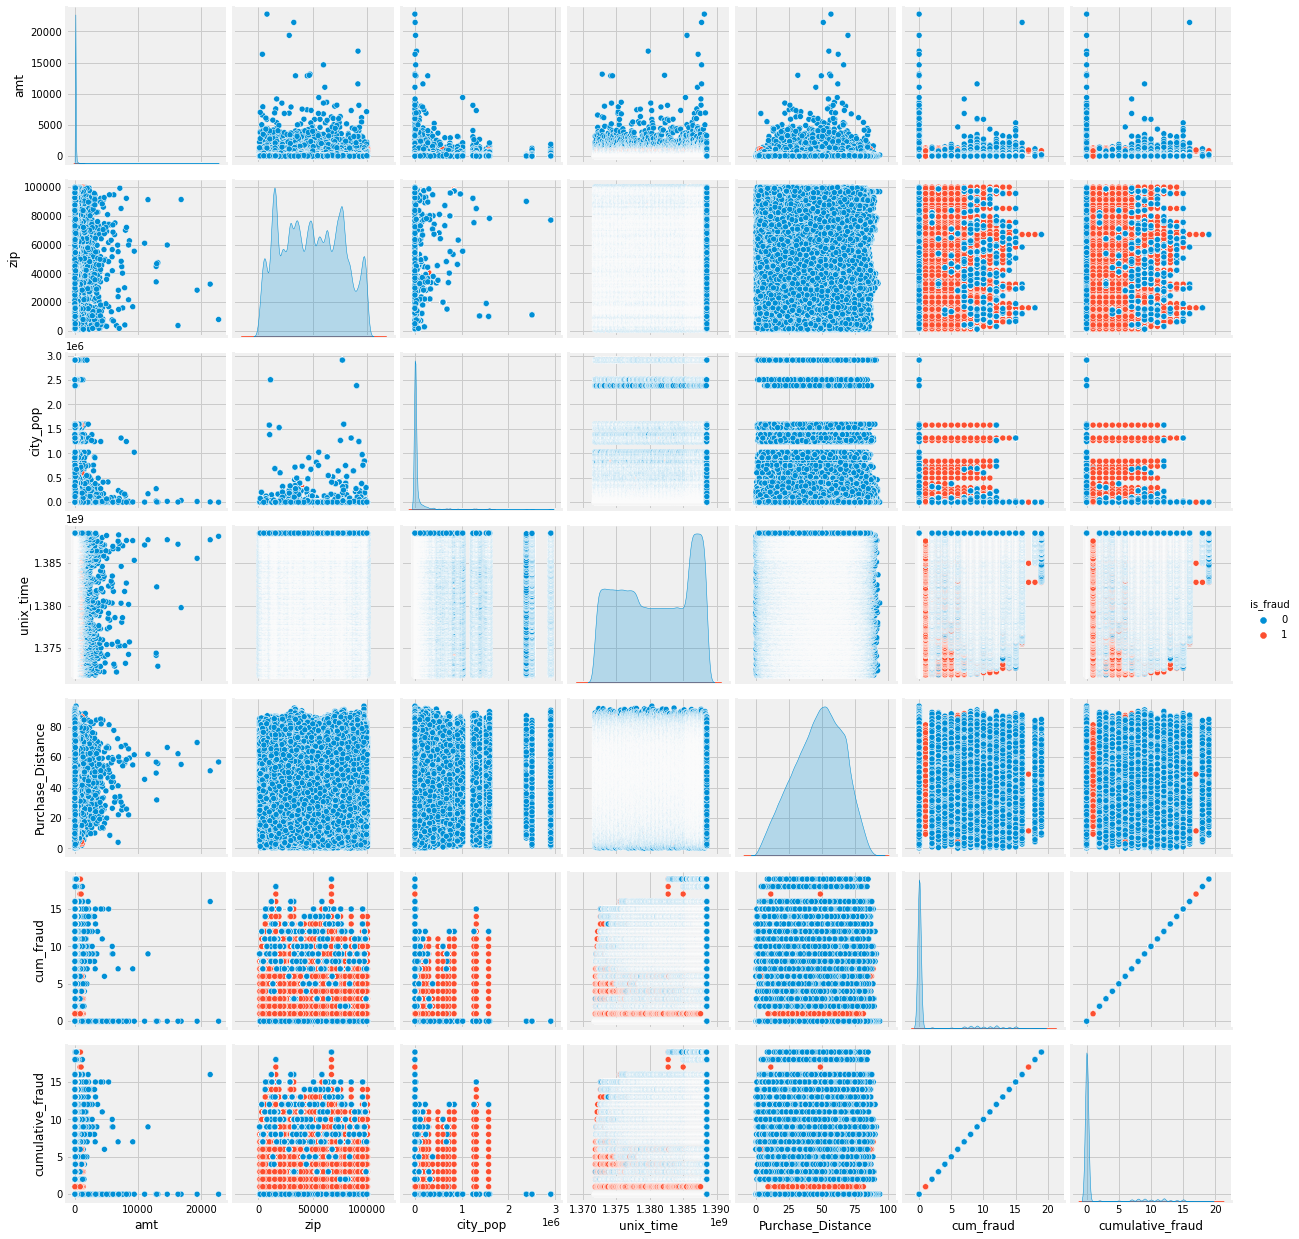

In [316]:
sns.pairplot(df, hue='is_fraud')

In [253]:
copy_df = df.copy()
copy_df['cum_fraud'] = df.groupby('name')['is_fraud'].cumsum()
#df.groupby('D')['Q'].cumsum()

In [254]:
df['cumulative_fraud'] = df.groupby('name')['is_fraud'].cumsum()

In [418]:
copy_df['time_since_prev_purchase'] = df.groupby('name')['unix_time'].diff()

In [423]:
copy_df[['name','time_since_prev_purchase', 'unix_time']].head(50)
ana_df = copy_df[copy_df.name == "Ana Howell"]

In [424]:
#person_df = df.groupby[['name']].count()

In [426]:
#ana_df

In [239]:
person_df.head(50)

,trans_date_trans_time,merchant,category,amt,gender,zip,city_pop,job,dob,unix_time,is_fraud,Purchase_Distance
name,,,,,,,,,,,,
Aaron Murray,870,870,870,870,870,870,870,870,870,870,870,870
Aaron Pena,715,715,715,715,715,715,715,715,715,715,715,715
Aaron Rogers,233,233,233,233,233,233,233,233,233,233,233,233
Aaron Stewart,200,200,200,200,200,200,200,200,200,200,200,200
Adam Keller,222,222,222,222,222,222,222,222,222,222,222,222
Adam Kirk,640,640,640,640,640,640,640,640,640,640,640,640
Adam Mcdonald,445,445,445,445,445,445,445,445,445,445,445,445
Adam Riddle,846,846,846,846,846,846,846,846,846,846,846,846
Adam Santos,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045


In [28]:
ana_df = df[df.name == "Ana Howell"]
#ana_df.head(50)

In [29]:
ana_fraud = ana_df[ana_df.is_fraud != 0]

In [ ]:
#ana_fraud

In [30]:
scamees = (df.loc[df['name'].isin(fraud_df.name.unique())])


In [ ]:
#sns.pairplot(scamees, hue='is_fraud')

In [255]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', 'zip',
       'city_pop', 'job', 'dob', 'unix_time', 'is_fraud', 'name',
       'Purchase_Distance', 'cum_fraud', 'cumulative_fraud'],
      dtype='object')

In [256]:
df1 = pd.get_dummies(df, columns = ["category" , "gender"] , drop_first = True) 

In [257]:
df1.columns

Index(['trans_date_trans_time', 'merchant', 'amt', 'zip', 'city_pop', 'job',
       'dob', 'unix_time', 'is_fraud', 'name', 'Purchase_Distance',
       'cum_fraud', 'cumulative_fraud', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'gender_M'],
      dtype='object')

Trying KNN Modeling

In [90]:
knn_X = df1[['amt', 'zip', 'city_pop',
        'unix_time', 'Purchase_Distance',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M']]
#X = df[['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', 'zip',
#       'city_pop', 'job', 'dob', 'unix_time', 'name',
#       'Purchase_Distance']]
knn_y = df['is_fraud']

In [191]:
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(knn_X, knn_y, test_size=0.2, random_state=42)

In [98]:
knn = KNeighborsClassifier(n_neighbors=50)

knn.fit(knn_X_train, knn_y_train)
knn_y_pred = knn.predict(knn_X_test)

print(metrics.accuracy_score(knn_y_test, knn_y_pred))

KeyboardInterrupt: 

In [99]:
knn = KNeighborsClassifier(n_neighbors=100)
scores = cross_val_score(knn, knn_X_train, knn_y_train, cv=10, scoring='accuracy')

print(scores)

KeyboardInterrupt: 

In [ ]:
knn.fit(knn_X_train, knn_y_train)
print("kNN confusion matrix: \n\n", confusion_matrix(knn_y_train, knn.predict(knn_X_train)))

Log Regression Model

In [100]:
#log_X = df[['amt', 'zip', 'city_pop', 'unix_time', 'Purchase_Distance']]
log_X = knn_X
X = df[['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender', 'zip',
       'city_pop', 'job', 'dob', 'unix_time', 'name',
       'Purchase_Distance']]
log_y = df['is_fraud']

In [107]:
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(log_X, log_y, random_state=42)
lm = LogisticRegression(C = 1, max_iter=1000)
lm.fit(log_X_train, log_y_train)
print("Logistic score: {:6.4f}".format(lm.score(log_X_train,log_y_train)))

Logistic score: 0.9961


In [120]:
def make_confusion_matrix(model, threshold=0.0001):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    log_y_predict = (model.predict_proba(log_X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(log_y_test, log_y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

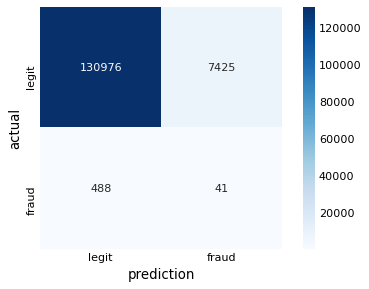

In [141]:
make_confusion_matrix(lm, threshold=0.004000)

In [163]:
from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(lm, threshold), threshold=(0,1.0000,0.0001))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.0001), Output()), _dom_c…

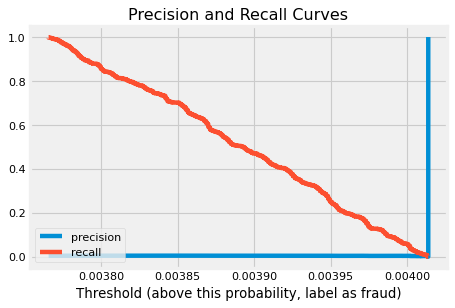

In [117]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(log_y_train, lm.predict_proba(log_X_train)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [167]:
55/529

0.10396975425330812

In [168]:
12925/138401

0.09338805355452634

In [181]:
lr_4x = LogisticRegression(class_weight={1 : 100, 0 : 1}, solver='liblinear')


In [182]:
lr_4x.fit(log_X_train, log_y_train)
print("Logistic score: {:6.4f}".format(lr_4x.score(log_X_train,log_y_train)))

Logistic score: 0.9961


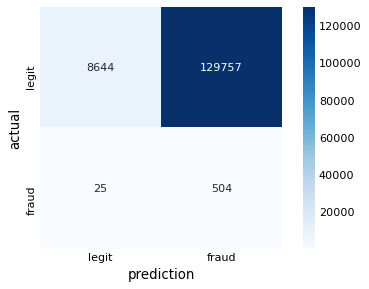

In [190]:
make_confusion_matrix(lr_4x, threshold=0.26)

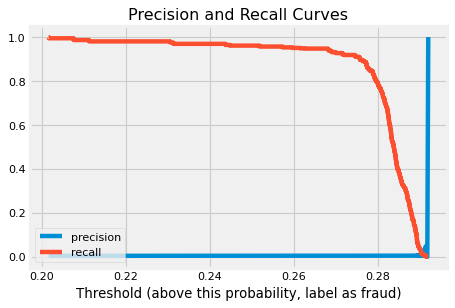

In [184]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(log_y_train, lr_4x.predict_proba(log_X_train)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [307]:
X1 = df1[['amt', 'zip', 'city_pop',
        'unix_time', 'Purchase_Distance',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M']]

#log_X = df1[['amt' ,'cum_fraud' , 'city_pop']]
log_X = df1[['cum_fraud' , 'amt', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']]

In [308]:
X_train, X_test, y_train, y_test = train_test_split(log_X, knn_y, test_size=0.2, random_state=42)

In [309]:
lr_4x = LogisticRegression(class_weight={1 : 100, 0 : 1}, solver='liblinear')
lr_4x.fit(X_train, y_train)
print("Logistic score: {:6.4f}".format(lr_4x.score(X_train, y_train)))


Logistic score: 0.9466


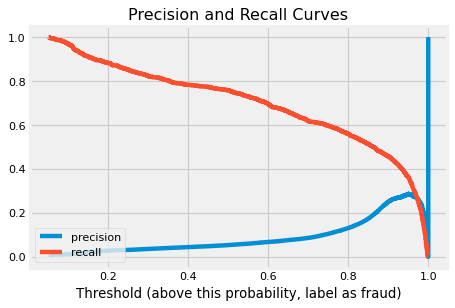

In [310]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_train, lr_4x.predict_proba(X_train)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [311]:
def make_confusion_matrix(model, threshold=0.9):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    log_y_predict = (model.predict_proba(X_train)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_train, log_y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')



In [312]:
interactive(lambda threshold: make_confusion_matrix(lr_4x, threshold), threshold=(0,1.0000,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

0.02079005365175136

In [234]:
##amount was only feature
print(9076 / (434229 + 8627))
print(1126 / (1112 + 607))

0.020494246436764996
0.6550319953461314


In [235]:
print(2502 / (434229 + 8627))
print(776 / (1112 + 607))

0.005649691999205159
0.4514252472367656


In [313]:
print(6414 / 442856)
print(961 / 1719)

0.014483263182614664
0.5590459569517161


Working with Decision Trees and Random Forest

In [347]:
dt = DecisionTreeClassifier(max_depth=10)

In [366]:
'''
dec_X = df1[['cum_fraud' , 'amt', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']]
'''
#dec_X = df1[['cum_fraud' , 'amt' , 'city_pop']]
dec_X = df1[['amt' , 'city_pop']]
dec_y = knn_y

In [367]:
dec_X_train, dec_X_test, dec_y_train, dec_y_test = train_test_split(dec_X, dec_y, test_size=0.2, random_state=42)

In [368]:
dt.fit(dec_X_train, dec_y_train)
dt.score(dec_X_test, dec_y_test)

0.996176131864968

In [369]:
def make_confusion_matrix(model, threshold=0.9):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    dec_y_predict = (model.predict_proba(dec_X_train)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(dec_y_train, dec_y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [370]:
interactive(lambda threshold: make_confusion_matrix(dt, threshold), threshold=(0,1.0000,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [356]:
###with all purchase categories
print(1205 / 442856)
print(1446 / 1719)

0.002720974763805842
0.8411867364746946


In [340]:
##with cum_fraud and amt only
print(1 / (110600 + 118))
print(309 / (309 + 117))


0.0010657706967250131
0.7253521126760564


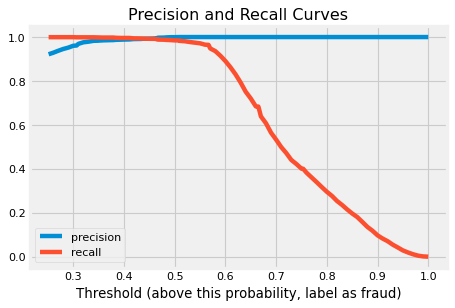

In [373]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(dec_y_train, rf.predict_proba(dec_X_train)[:,1])

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

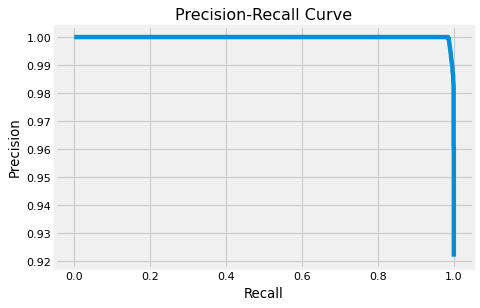

In [381]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [384]:
fpr, tpr, thresholds = roc_curve(dec_y_test, rf.predict_proba(dec_X_test)[:,1])


ROC AUC score =  0.8894147458496895


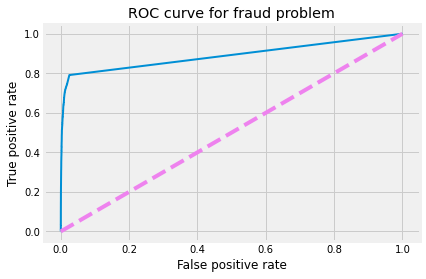

In [385]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(dec_y_test, rf.predict_proba(dec_X_test)[:,1]))

In [371]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(dec_X_train, dec_y_train)
rf.score(dec_X_test, dec_y_test)

0.996320089253581

In [372]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    dec_y_predict = (model.predict_proba(dec_X_train)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(dec_y_train, dec_y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['legit', 'fraud'],
           yticklabels=['legit', 'fraud']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0,1.0000,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [378]:
1717 / (1719)

0.9988365328679465

In [398]:
scores = cross_val_score(rf, dec_X_train, dec_y_train, cv=10, scoring='recall')


In [399]:
scores

array([0.26744186, 0.23255814, 0.27325581, 0.23255814, 0.24418605,
       0.29239766, 0.24418605, 0.29069767, 0.22674419, 0.24418605])

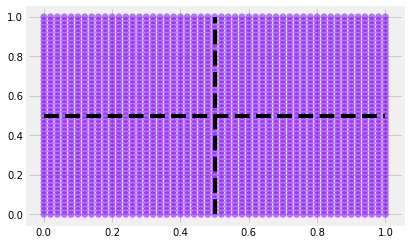

In [393]:
def visualize(X, y, bdry='diag'):
    c = cm.rainbow(np.linspace(0, 1, 2))
    plt.scatter([i[0] for i in X], [i[1] for i in X], color=[c[i] for i in y], alpha=.5)
    
    #Plot the true decision boundary
    if bdry == 'diag':
        plt.plot([0, 1], [0, 1], 'k--')
    elif bdry == 'quadrant':
        plt.plot([0, 1], [0.5, 0.5], 'k--')
        plt.plot([0.5, 0.5], [0, 1], 'k--')
        
    plt.grid(True)


grid = np.mgrid[0:1.02:0.02, 0:1.02:0.02].reshape(2,-1).T
visualize(grid, rf.predict(grid), bdry='quadrant')

In [394]:
 dec_X_train1, dec_X_test1, dec_y_train1, dec_y_test1 = train_test_split(dec_X, dec_y, test_size=0.5, random_state=16)

In [396]:
#rf = RandomForestClassifier(n_estimators=100)
rf.fit(dec_X_train1, dec_y_train1)
rf.score(dec_X_test1, dec_y_test1)

0.9962535089613475

In [ ]:
interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0,1.0000,0.01))

In [397]:
scores = cross_val_score(rf, dec_X_train1, dec_y_train1, cv=5, scoring='precision')

In [408]:
(rf.predict(dec_X_test1))